#                                     INTRODUCTION





FIFA 19 is a football simulation video game developed by EA Vancouver as part of Electronic Arts' FIFA series. FIFA 19 contains a rich dataset with plenty of attributes covering all aspects of a real-life footballer in an attempt to immitate him as much as possible in the virtual world. This rich dataset provides a huge oppurtunity for us, data scientists or data analysts to analyze and come up with visualizations and patterns. I will try to cover the following:

- The dataset distribution based on player nationality, player overall rating, age vs overall rating, player valuation and so on.<br>
- The patterns in the dataset
- Top football playing Countries, Top Clubs, Top players and so on.



<font color=blue>
First we import packages used in our analysis.
</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
%matplotlib inline

In [3]:
sns.set_style('darkgrid')

<font color=blue>Now we will load the dataset and get familiar with it by having a look on first few records.</font>

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [7]:
df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


# <font color=blue>Light Data cleaning</font>

<font color = blue>

We notice that there are a number of fields which are of no use in our analysis
.These fields include Unnamed:0, ID, Photo, Club Logo and so on. These fields need to be dropped. 
There are also some fields like Value, Wage which needs modification so as to aid our analysis process. </font>



In [8]:
df.drop(['Unnamed: 0','Photo','Flag','Club Logo'],axis=1,inplace=True)

In [9]:
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


<font color=blue>Converting Wage and Value columns from currency to normal numbers. </font>

In [10]:
def value_wage(df_value):
    try:
        value = float(df_value[1:-1])
        end = df_value[-1:]

        if end == 'M':
            value = value * 1000000
        elif end == 'K':
            value = value * 1000
    except ValueError:
        value = 0
        
    return value

df['Value'] = df['Value'].apply(value_wage)
df['Wage'] = df['Wage'].apply(value_wage)

## Analysis

<font color = blue> We try to find out which countries have the most number of players in the game.</font>

In [13]:
print('Total number of countries : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))


Total number of countries : 164
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64


<font color = blue>England is represented the most number of players by over 1600 players in the dataset, followed by Germany, Spain, Argentina and France. </font>

<font color = blue> Clubs with most number of players. </font>

In [14]:
print('Total number of clubs : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(5))

Total number of clubs : 651
Cardiff City           33
Newcastle United       33
Manchester City        33
Eintracht Frankfurt    33
Empoli                 33
Name: Club, dtype: int64


<font color = blue> Best playes with respect to attributes.</font>

In [15]:
best_col=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(best_col):
    print('Best {0} : {1}'.format(best_col[i],df.loc[df[best_col[i]].idxmax()][1]))
    i += 1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


<font color = blue> Top Earner and most market valued player.</font>

In [16]:
print('Most valued player : '+str(df.loc[df['Value'].idxmax()][1]))
print('Highest earner : '+str(df.loc[df['Wage'].idxmax()][1]))

Most valued player : Neymar Jr
Highest earner : L. Messi


<font color = blue>Players with highest market value</font>

In [17]:
df.sort_values(by = 'Value' , ascending = False)[['Name' , 'Club' , 'Nationality' , 
                                                     'Overall' , 'Value' , 'Wage']].head(5)

,Name,Club,Nationality,Overall,Value,Wage
2,Neymar Jr,Paris Saint-Germain,Brazil,92,118500000.0,290000.0
0,L. Messi,FC Barcelona,Argentina,94,110500000.0,565000.0
4,K. De Bruyne,Manchester City,Belgium,91,102000000.0,355000.0
5,E. Hazard,Chelsea,Belgium,91,93000000.0,340000.0
15,P. Dybala,Juventus,Argentina,89,89000000.0,205000.0


## Visualization of Data

<font color = blue> Countries with the most number of players in the game.</font>

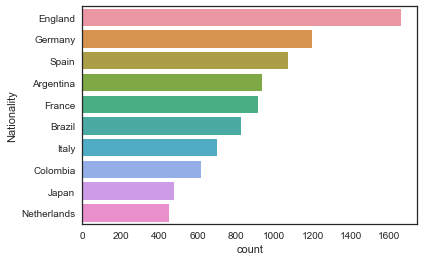

In [50]:
sns.countplot(y = 'Nationality', data=df, order = df.Nationality.value_counts().iloc[:10].index);

<font color = blue>Effect of Age on player's wage. </font>

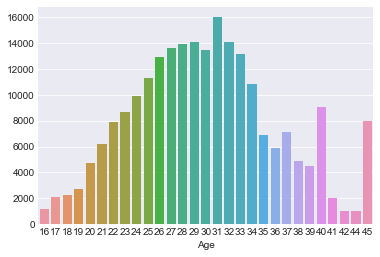

In [18]:
mean_wage_per_age = df.groupby('Age')['Wage'].mean()
pl = sns.barplot(x = mean_wage_per_age.index, y = mean_wage_per_age.values)


<font color = blue>Players wages start growing exponentially after age 20 and reach a peak at age 27-32 after which it reduces steeply again..</font>

<font color = blue> Sprint speed and age relation</font>

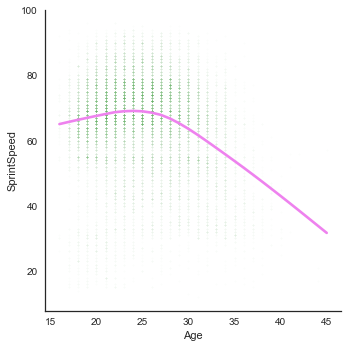

In [46]:
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'violet'})

<font color = blue>As the age increases the sprint speed decreases </font>

In [19]:
talents_df = df.filter(["Name", "Club", "Overall"])
talents_df = talents_df[talents_df.Overall >= 85]
talents_df = talents_df.groupby("Club").count()
talents_df = talents_df.sort_values(by=['Name'],ascending=False)
top_ten_clubs = talents_df[:10]
top_ten_clubs = list(top_ten_clubs.index.values)

top_count =  list(talents_df.iloc[:, 1])


<font color = blue> Top ten clubs with maximum number of players with overall rating > 85. </font>

In [20]:
top_ten_clubs

['Real Madrid',
 'Manchester City',
 'Juventus',
 'FC Barcelona',
 'FC Bayern München',
 'Atlético Madrid',
 'Paris Saint-Germain',
 'Inter',
 'Tottenham Hotspur',
 'Liverpool']

In [21]:
#top_ten_clubs = ['FC Barcelona', 'Real Madrid', 'Manchester City', 'Arsenal', 'Liverpool', 'Manchester United', 'Borussia Dortmund', 'FC Bayern München', 'Juventus', 'Paris Saint-Germain']
top_ten_clubs_data = df.loc[df['Club'].isin(top_ten_clubs), :]


<font color = blue> Wages budget compare across top clubs </font>

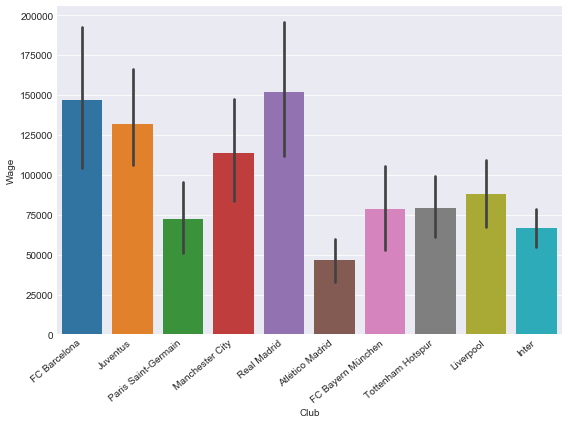

In [22]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x = "Club",y = "Wage",data = top_ten_clubs_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

<font color = blue>FC Barcelona and Real Madrid have the highest wage budgets, followed closely by Juventus and Manchester City </font >

<font color = blue> Market values of players compare across top clubs. </font>

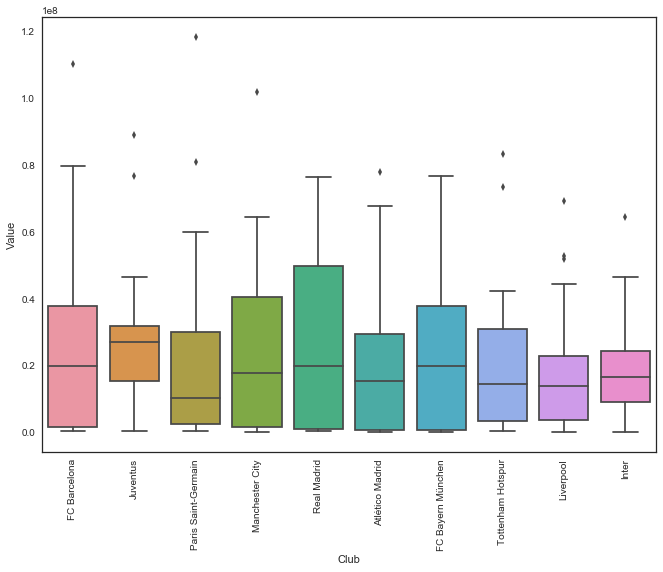

In [24]:
sns.set(style="white")
plt.figure(figsize=(11,8))
p = sns.boxplot(x = 'Club', y = 'Value', data = top_ten_clubs_data)
p = plt.xticks(rotation=90)

<font color = blue>Currently Juventus have the most expensive players followed by Real Madrid, FC Barcelona and Liverpool. </font>

<font color = blue>Country wise distribution of overall rating </font>

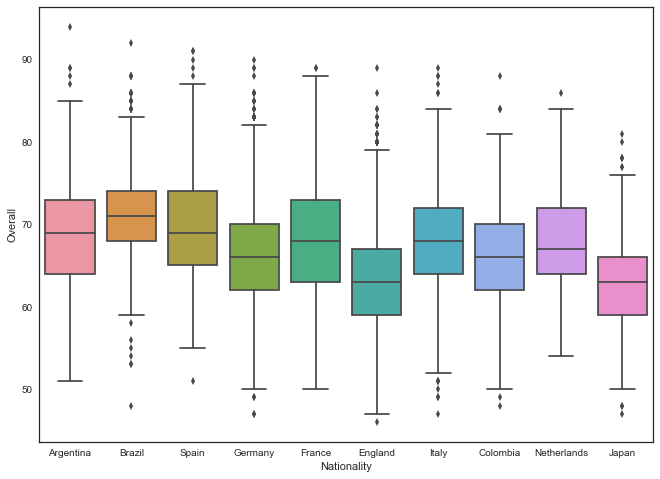

In [26]:
top_ten_countries = df['Nationality'].value_counts().head(10).index.values
top_ten_countries_data = df.loc[df['Nationality'].isin(top_ten_countries), :]

plt.figure(figsize=(11, 8))
p = sns.boxplot(x = 'Nationality', y = 'Overall', data = top_ten_countries_data)

<font color = blue>Spain, Brazil and Argentina have the players with highest overall scores </font>

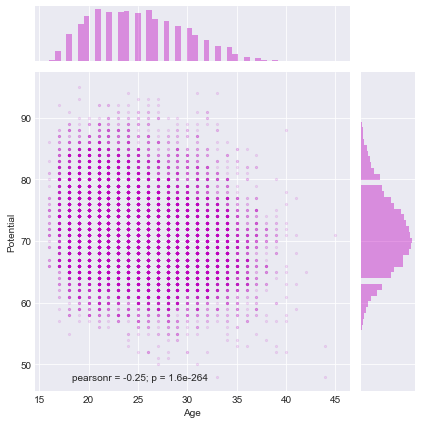

In [123]:
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'m'},
              marginal_kws={'color':"m"})


<font color = blue>Top 5 left-footed players </font>

In [27]:
 
df[df['Preferred Foot'] == 'Left'][['Name','Overall']].head()

,Name,Overall
0,L. Messi,94
13,David Silva,90
15,P. Dybala,89
17,A. Griezmann,89
19,T. Courtois,89


<font color = blue>Top 5 right-footed players </font>

In [29]:
 
df[df['Preferred Foot'] == 'Right'][['Name','Overall']].head()

,Name,Overall
1,Cristiano Ronaldo,94
2,Neymar Jr,92
3,De Gea,91
4,K. De Bruyne,91
5,E. Hazard,91


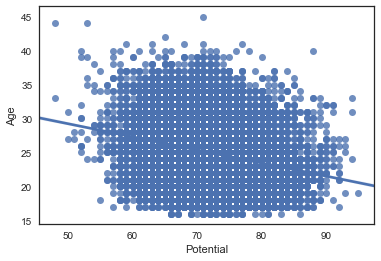

In [39]:
value = df.Value
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

sns.regplot(y="Age", x="Potential",  
        
             data=df);

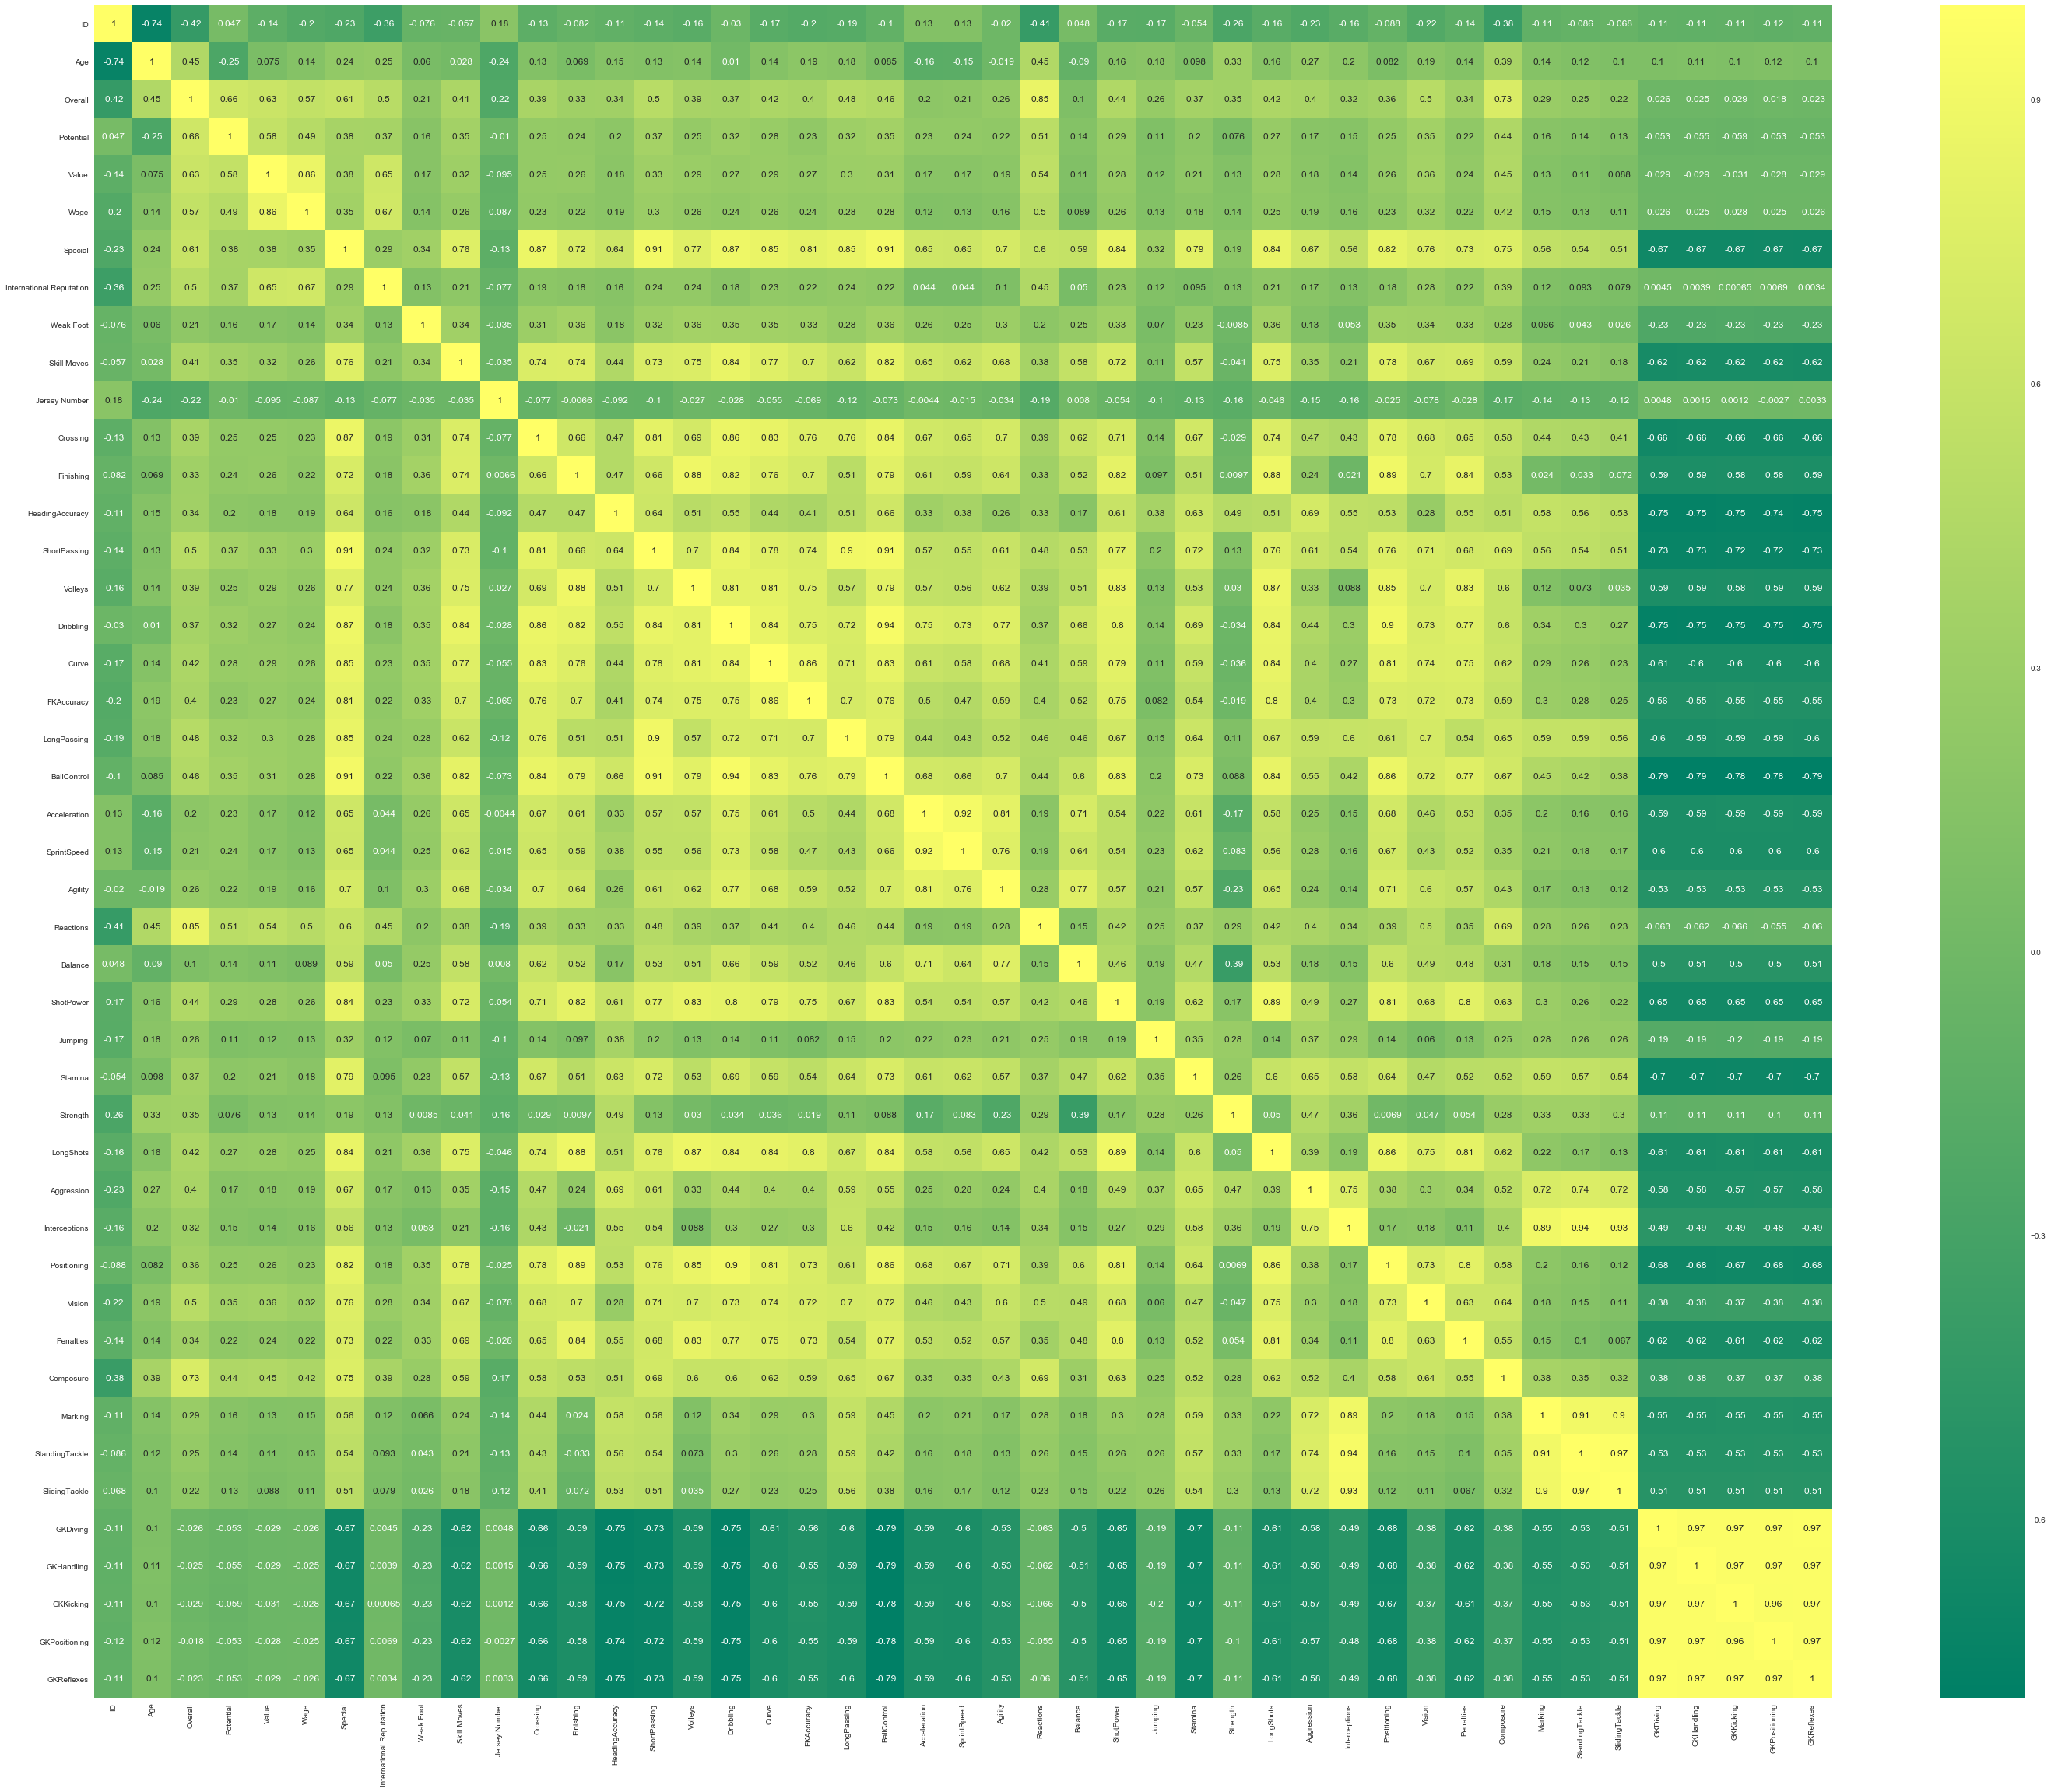

In [43]:
plt.figure(figsize=(50,40))
p = sns.heatmap(df.corr(), annot=True, cmap = "summer")